### CNN Performance
- CNN 모델을 제작할 때, 다양한 기법을 통해 성능 개선 및 과적합 개선이 가능하다.

#### Weight Initialization, 가중치 초기화
- 처음 가중치를 어떻게 줄 것인지를 정하는 방법이며, 처음 가중치를 어떻게 설정하느냐에 따라 모델의 성능이 크게 달라질 수 있다.

> 1. 사비에르 글로로트 초기화 (Xavier Glorot initialization), glorot_normal(정규 분포), glorot_uniform(균등 분포)
> - 고정된 표준편차를 사용하지 않고, 이전 층의 노드 수에 맞게 현재 층의 가중치를 초기화한다.
> - 층마다 노드 개수를 다르게 설정하더라도 이에 맞게 가중치가 초기화되기 때문에 고정된 표준편차를 사용하는 것보다 이상치에 민감하지 않다.
> - 활성화 함수가 ReLU일 경우에는 층이 지날 수록 활성화 값이 고르지 못하게 되는 문제가 생기기 때문에, 출력층에서 사용한다.  
>
<div style="display: flex; margin-left: 50px;">
    <div>
        <img src="./images/xavier01.png">
    </div>
    <div>
        <img src="./images/xavier02.png" style="margin-left: 50px;">
    </div>
</div>


> 2. 카이밍 히 초기화 (Kaiming He Initialization), he_normal(정규 분포), he_uniform(균등 분포)
> - 고정된 표준편차를 사용하지 않고, 이전 층의 노드 수에 맞게 현재 층의 가중치를 초기화한다.
> - 층마다 노드 개수를 다르게 설정하더라도 이에 맞게 가중치가 초기화되기 때문에 고정된 표준편차를 사용하는 것보다 이상치에 민감하지 않다.
> - ReLU함수를 활성화 함수로 사용할 때 추천되는 초기화 방법으로서, 층이 깊어지더라도 모든 활성값이 고르게 분포된다.
> 
<img src="./images/he.png" style="margin-left: 50px;">

#### Batch Normalization, 배치 정규화
- classifier 영역에서 입력 데이터 간에 값의 차이가 발생하면, 가중치의 비중도 달라지기 때문에  
층을 통과할 수록 편차가 심해진다. 이를 내부 공변량 이동(Internal Covariant Shift)이라고 한다.
- 가중치의 비중이 달라지면, 특정 가중치에 중점을 두면서 경사 하강법이 진행되기 때문에,  
모든 입력값을 표준 정규화하여 최적의 parameter를 보다 빠르게 학습할 수 있도록 해야한다.
- 입력층 정규화와 다르게, 중간의 은닉층까지 정규화를 할 수 있다.
- 가중치를 초기화할 때 민감도를 감소 시키고, 학습 속도 증가 시키며 , 모델을 일반화하기 위해서 BN을 사용한다.

<div style="display: flex; width: 80%;">
    <div>
        <img src="./images/BN01.png" width="800" style="margin-top: 20px;">
    </div>
    <div>
        <img src="./images/BN02.png" width="800">
    </div>
</div>

- batch normalization은 activation function 앞에 적용하면, weight 값은 평균이 0, 분산이 1인 상태로 분포(정규 분포)가 된다.
- ReLU가 activation으로 적용되면 음수에 해당하는(절반 정도) 부분이 0이 된다. 이러한 문제를 해결하기 위해 γ(감마),β(베타)를 사용하여  
음수 부분이 모두 0으로 되지 않도록 방지한다.

<div style="display: flex; width: 70%;">
    <div>
        <img src="./images/BN03.png" width="1000" style="margin-top: 20px;">
    </div>
    <div>
        <img src="./images/BN04.png" width="800">
    </div>
</div>

#### Batch Size
- batch size를 작게 하면, 적절한 noise가 생겨서 overfitting을 방지하게 되고, 모델의 성능을 향상시키는 계기가 될 수 있지만, 너무 작아서는 안된다.
- batch size를 너무 작게 하는 경우에 batch당 sample의 수가 작아져서 훈련 데이터를 학습하는 데에 부족할 수 있다.
- 따라서 굉장히 크게 주는 것 보다는 작게 주는 것이 좋으며, 이를 또 너무 작게 주어서는 안된다(논문에 따르자면 8보다 크고 32보다 작게 준다.)
- batch size를 최대한 크게 주면 그 만큼 Batch의 분포와 Train 데이터의 분포가 비슷해져서  
더 많은 sample의 수로 학습하여 더 나은 가중치로 update된다고 생각할 수 있지만,  
실제로는 작은 batch size로 더 자주 계산하고 가중치를 update하는 것이 보다 정확한 최적화가 가능하다.

<div style="display: flex; width: 70%;">
    <div>
        <img src="./images/alexnet_without_BN.png" width="800">
    </div>
    <div>
        <img src="./images/alexnet_with_BN.png" width="780" style="margin-top: 10px;">
    </div>
</div>

#### Global Average Pooling
- 이전의 Pooling들은 면적을 줄이기 위해 사용했지만, Global Average Pooling은 면적을 없애고 채널 수 만큼 값을 나오게 한다.
- Global Average Pooling은 피처맵의 가로x세로의 특정 영역을 Sub sampling하지 않고, 채널 별로 평균 값을 추출한다.
- Feature map의 채널 수가 많을 경우(보통 512개 이상) 이를 적용하고, 채널 수가 적다면 Flatten을 적용한다.
- Flatten 후에 Classification Dense Layer로 이어지면서 많은 파라미터들로 인한 오버피팅 유발 가능성 증대 및 학습 시간 늘어난다.
- 맨 마지막 Feature Map의 채널 수가 크다면 GlobalAveragePooling2D를 적용하는 것이 더 나을 수 있다.
<img src="./images/global_average_pooling.png" width="600" style="margin:20px; margin-left: 0">

#### Weight Regularization (가중치 규제), Weight Decay (가중치 감소)
- 손실 함수(loss function)는 loss 값이 작아지는 방향으로 가중치를 update한다.  
하지만 loss를 줄이는 데에만 신경쓰게 되면, 특정 가중치가 너무 커지면서 오히려 나쁜 결과를 가져올 수 있다.
- 기존 가중치에 특정 연산을 수행하여 loss function의 출력 값과 더하면 결과를 어느 정도 제어할 수 있게 된다.
- 보통 파라미터가 많은 Dense Layer에 많이 사용한다.
- 이름은 가중치 규제이긴 하지만, 손실함수에 규제를 걸어서 가중치를 감소(일반화)시킨다고 해석하는 것이 더 어울린다.
- kernel_regularizer 파라미터에서 l1(가중치에 절대값), l2(가중치에 제곱)을 선택할 수 있다.
<img src="./images/regularization.png" width="450" style="margin-left: -30px">

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from tensorflow.keras.datasets import cifar10

(train_images, train_targets), (test_images, test_targets) = cifar10.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


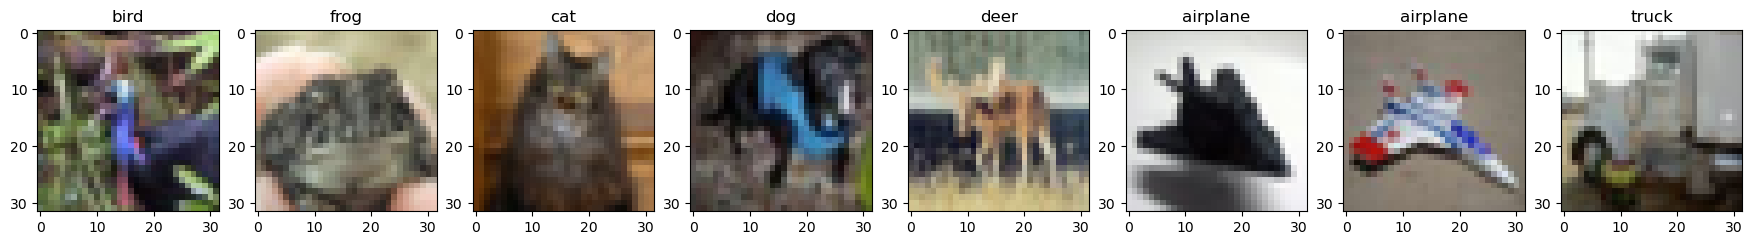

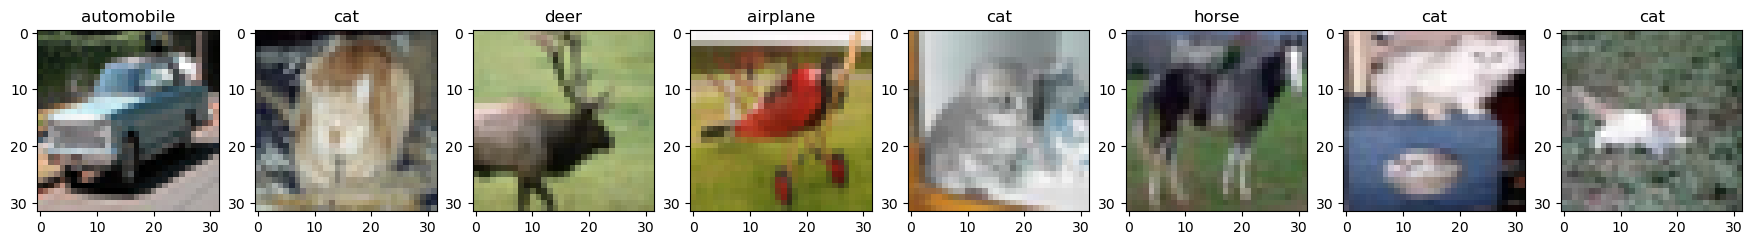

In [4]:
import matplotlib.pyplot as plt

CLASS_NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

def show_images(images, targets, ncols=8):
    figure, axs = plt.subplots(1, ncols, figsize=(22, 6))
    for i in range(ncols):
        axs[i].imshow(images[i])
        target = targets[i].squeeze()
        axs[i].set_title(CLASS_NAMES[int(target)])
    
show_images(train_images[24:32], train_targets[24:32])
show_images(train_images[32:40], train_targets[32:40])

In [7]:
train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

train_targets.shape, test_targets.shape

((50000,), (10000,))

In [14]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)
    
    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)
    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)
    
    train_train_images, validation_images, train_train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)
    
    return (train_train_images, train_train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [15]:
(train_train_images, train_train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_train_images.shape, train_train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(40000, 32, 32, 3) (40000, 10)
(10000, 32, 32, 3) (10000, 10)
(10000, 32, 32, 3) (10000, 10)


In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 32

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# alpha 값을 크게 하면 비용 함수는 Weight 값을 작게 해서 과적합을 개선할 수 있고
# alpha 값을 작게 하면 Weight 값이 커져도 어느정도 상쇄하므로 일반화 될 수 있다.
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(0.00001), kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(0.00001), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(0.00001), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_regularizer=l2(0.00001), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', strides=2, kernel_regularizer=l2(0.00001), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output', kernel_initializer='glorot_normal')(x)

model = Model(inputs = input_tensor, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                            

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}.h5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', verbose=1)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)

In [21]:
history = model.fit(
    x=train_train_images, 
    y=train_train_oh_targets, 
    batch_size=30, 
    epochs=20, 
    validation_split=0.2,
    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
1067/1067 [==============================] - ETA: 0s - loss: 1.5217 - acc: 0.4582
Epoch 1: val_loss improved from inf to 1.38497, saving model to ./callback_files\weights.001-1.3850.h5
1067/1067 [==============================] - 330s 307ms/step - loss: 1.5217 - acc: 0.4582 - val_loss: 1.3850 - val_acc: 0.5404 - lr: 0.0010
Epoch 2/20
1067/1067 [==============================] - ETA: 0s - loss: 1.0903 - acc: 0.6327
Epoch 2: val_loss did not improve from 1.38497
1067/1067 [==============================] - 325s 305ms/step - loss: 1.0903 - acc: 0.6327 - val_loss: 1.6620 - val_acc: 0.5263 - lr: 0.0010
Epoch 3/20
1067/1067 [==============================] - ETA: 0s - loss: 0.9170 - acc: 0.7039
Epoch 3: val_loss did not improve from 1.38497
1067/1067 [==============================] - 326s 305ms/step - loss: 0.9170 - acc: 0.7039 - val_loss: 1.5879 - val_acc: 0.5460 - lr: 0.0010
Epoch 4/20
1067/1067 [==============================] - ETA: 0s - loss: 0.7917 - acc: 0.7536
Epoch 4: va

In [22]:
model.evaluate(test_images, test_oh_targets, batch_size=30, verbose=1)

334/334 [==============================] - 18s 53ms/step - loss: 0.7583 - acc: 0.8053


[0.7583205699920654, 0.8052999973297119]

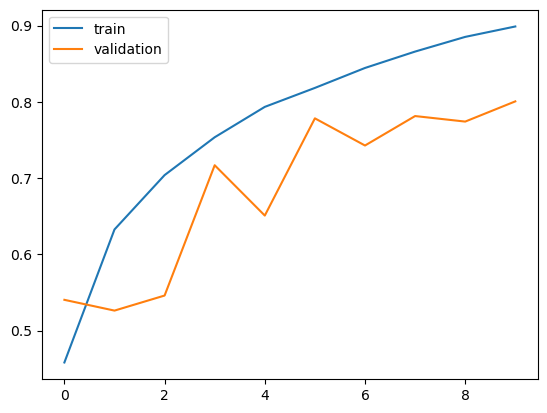

In [23]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()

show_history(history)